In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
import warnings

warnings.filterwarnings('ignore')

## 1. Tek değişkenli analiz yaparak verileri yorumlayın, önemli gördüğünüz noktaları belirtin.

In [3]:
df = pd.read_csv('states_all.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [7]:
df.isnull().sum()

PRIMARY_KEY                       0
STATE                             0
YEAR                              0
ENROLL                          263
TOTAL_REVENUE                   212
FEDERAL_REVENUE                 212
STATE_REVENUE                   212
LOCAL_REVENUE                   212
TOTAL_EXPENDITURE               212
INSTRUCTION_EXPENDITURE         212
SUPPORT_SERVICES_EXPENDITURE    212
OTHER_EXPENDITURE               263
CAPITAL_OUTLAY_EXPENDITURE      212
GRADES_PK_G                     173
GRADES_KG_G                     132
GRADES_4_G                      131
GRADES_8_G                      131
GRADES_12_G                     131
GRADES_1_8_G                    131
GRADES_9_12_G                   131
GRADES_ALL_G                    173
AVG_MATH_4_SCORE                956
AVG_MATH_8_SCORE                960
AVG_READING_4_SCORE             959
AVG_READING_8_SCORE             994
dtype: int64

In [46]:
years = df.YEAR.unique()
states_all2 = df.copy()

listem = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE", 
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE", 
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G", 
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G", 
             "GRADES_9_12_G", "GRADES_ALL_G"] 

for sutun_adi in listem:
    for year in years:
        states_all2[sutun_adi].fillna(states_all2.groupby(by='YEAR').mean()[sutun_adi].loc[year], inplace=True)

In [26]:
states_all2.isnull().sum()

PRIMARY_KEY                       0
STATE                             0
YEAR                              0
ENROLL                            0
TOTAL_REVENUE                     0
FEDERAL_REVENUE                   0
STATE_REVENUE                     0
LOCAL_REVENUE                     0
TOTAL_EXPENDITURE                 0
INSTRUCTION_EXPENDITURE           0
SUPPORT_SERVICES_EXPENDITURE      0
OTHER_EXPENDITURE                 0
CAPITAL_OUTLAY_EXPENDITURE        0
GRADES_PK_G                       0
GRADES_KG_G                       0
GRADES_4_G                        0
GRADES_8_G                        0
GRADES_12_G                       0
GRADES_1_8_G                      0
GRADES_9_12_G                     0
GRADES_ALL_G                      0
AVG_MATH_4_SCORE                956
AVG_MATH_8_SCORE                960
AVG_READING_4_SCORE             959
AVG_READING_8_SCORE             994
dtype: int64

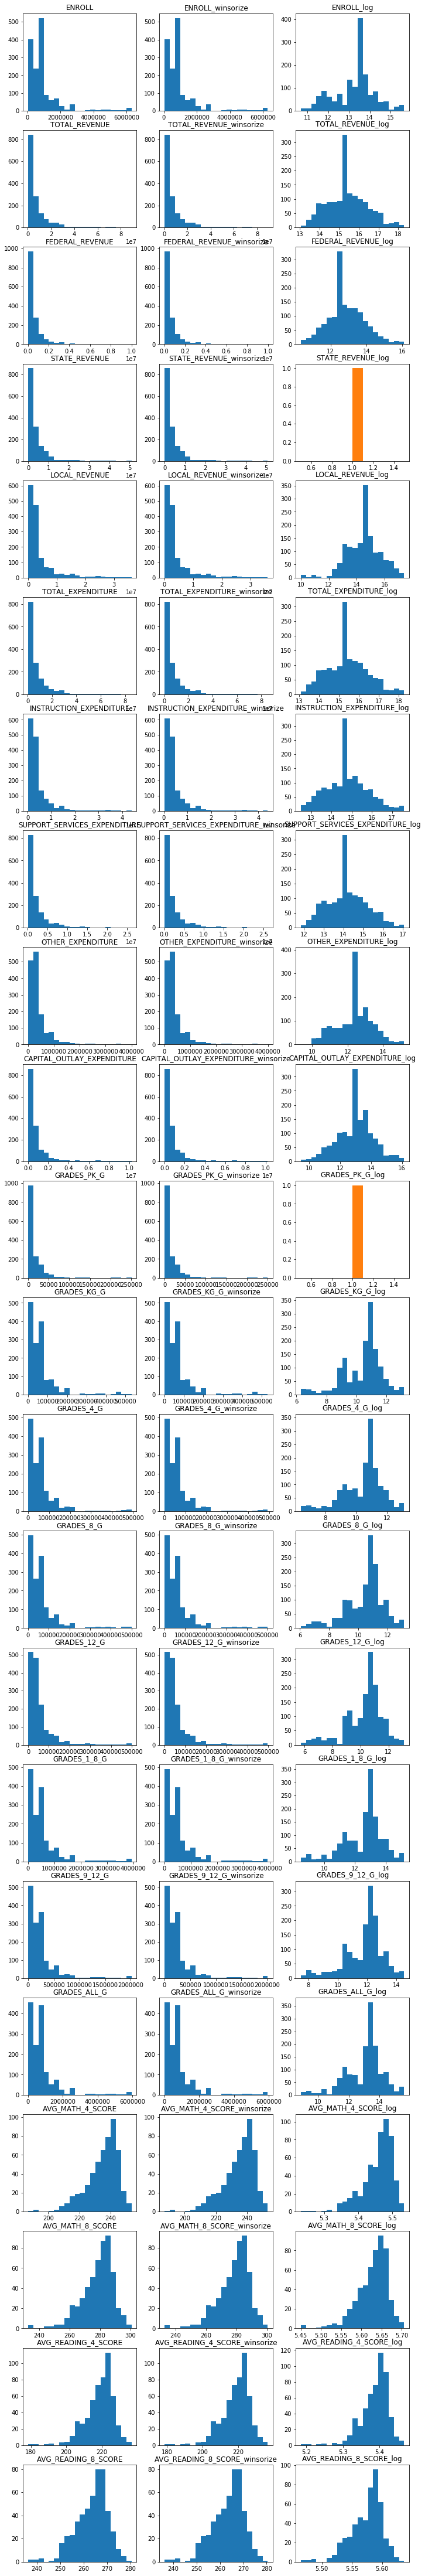

In [27]:
plt.figure(figsize=(16,80))

for i in range(3, len(states_all2.columns)):
    
    plt.subplot(len(states_all2.columns)-3, 4, 4*i-11)
    plt.hist(states_all2[states_all2.columns[i]], bins=20)
    plt.title(df.columns[i])
        
    plt.subplot(len(states_all2.columns)-3, 4, 4*i-10)
    plt.hist(winsorize(states_all2[states_all2.columns[i]]), bins=20)
    plt.title(states_all2.columns[i]+"_winsorize")
    
    plt.subplot(len(states_all2.columns)-3, 4, 4*i-9)
    try:
        plt.hist(np.log(states_all2[states_all2.columns[i]]), bins=20)
    except:
        plt.hist(1)
    plt.title(states_all2.columns[i]+"_log")
    
plt.show()

Ortalama ile doldurunca verimizi biraz yanılttığımızı log grafiklerinden anlıyoruz.

Dolayısıyla df dosyası üzerinden devam etmek daha doğru geliyor şu an.

## 2.Bir eyaleti ele alın (ör: California) ve toplam gelirleri ile toplam harcamalarının yıllara göre değişiminin doğru grafiğini çizin. Bu iki değişken yıllara göre değişim göstermekte midir? Zirve ve dip yaptığı yıllar var mı?

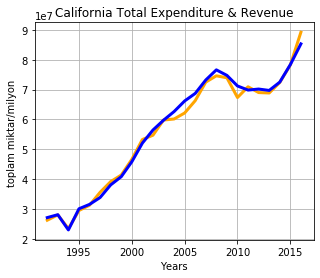

In [44]:
plt.figure(1, figsize = (5,4))

x = df[ df.STATE == 'CALIFORNIA']["YEAR"]
y = df[ df.STATE == 'CALIFORNIA']["TOTAL_REVENUE"]
y2 = df[ df.STATE == 'CALIFORNIA']["TOTAL_EXPENDITURE"]

plt.figure(1, figsize = (8.5,7))
plt.plot(x,y, label = 'Total Revenue', color='orange', linewidth=3)
plt.plot(x,y2, label = 'Total Expenditure',color='blue', linewidth=3)
plt.xlabel('Years')
plt.ylabel('toplam miktar/milyon ')
plt.title('California Total Expenditure & Revenue')
plt.grid()
plt.show()


bu grafiği bir de fillna yaptığımız statesall2 ile çizdirelim:

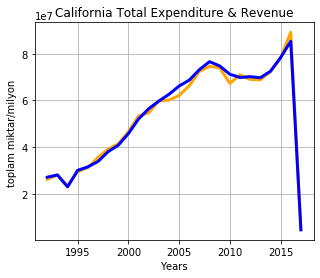

In [45]:
plt.figure(1, figsize = (5,4))

x = states_all2[ states_all2.STATE == 'CALIFORNIA']["YEAR"]
y = states_all2[ states_all2.STATE == 'CALIFORNIA']["TOTAL_REVENUE"]
y2 = states_all2[ states_all2.STATE == 'CALIFORNIA']["TOTAL_EXPENDITURE"]

plt.figure(1, figsize = (8.5,7))
plt.plot(x,y, label = 'Total Revenue', color='orange', linewidth=3)
plt.plot(x,y2, label = 'Total Expenditure',color='blue', linewidth=3)
plt.xlabel('Years')
plt.ylabel('toplam miktar/milyon ')
plt.title('California Total Expenditure & Revenue')
plt.grid()
plt.show()

## NAN değerler sondaymış diyebilir miyim?? California'nın revenuesü ve expenditure'ı ortalamanın üzerinde seyrettiği için toplam ortalamalar ile doldurunca, sonda bir düşüş görüyoruz diyebilir miyiz?

## 3. SORU: Seçtiğiniz eyalette, öğrenciler hangi derste daha başarılı? Matematik mi yoksa okuma mı?

In [47]:
# yıl sormadığı için doğrudan California ortalamalarını alabilirim:

df_cal = df[df['STATE']=='CALIFORNIA']
df_cal

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN
55,1993_CALIFORNIA,CALIFORNIA,1993,5129788.0,28043338.0,2151157.0,17064146.0,8828035.0,28110986.0,15281147.0,...,420233.0,380223.0,277271.0,3328627.0,1393530.0,4782111.0,NaN,NaN,NaN,NaN
106,1994_CALIFORNIA,CALIFORNIA,1994,4120498.0,23440845.0,2095878.0,13175550.0,8169417.0,23012688.0,12443864.0,...,426919.0,388561.0,285132.0,3372294.0,1421547.0,4860291.0,NaN,NaN,NaN,NaN
157,1995_CALIFORNIA,CALIFORNIA,1995,5299405.0,29512214.0,2612241.0,15541486.0,11358487.0,30097549.0,16146416.0,...,428553.0,399039.0,287428.0,3430751.0,1464841.0,4964774.0,NaN,NaN,NaN,NaN
208,1996_CALIFORNIA,CALIFORNIA,1996,5460484.0,31282981.0,2603882.0,17061474.0,11617625.0,31561692.0,16880730.0,...,435217.0,406456.0,298669.0,3516572.0,1525618.0,5115423.0,209.129083,262.772478,201.912591,269.197451
259,1997_CALIFORNIA,CALIFORNIA,1997,5595836.0,35614934.0,2850766.0,20560730.0,12203438.0,33862281.0,18160435.0,...,451069.0,412604.0,317595.0,3591033.0,1578929.0,5246546.0,NaN,NaN,NaN,NaN
310,1998_CALIFORNIA,CALIFORNIA,1998,5727224.0,39183018.0,3149260.0,22840500.0,13193258.0,38087666.0,20083913.0,...,462241.0,424768.0,334852.0,3666271.0,1627284.0,5375481.0,NaN,NaN,NaN,NaN
361,1999_CALIFORNIA,CALIFORNIA,1999,5839207.0,41393435.0,3599923.0,23695095.0,14098417.0,40834643.0,21110543.0,...,489356.0,431730.0,347914.0,3734997.0,1675778.0,5496767.0,NaN,NaN,NaN,NaN
412,2000_CALIFORNIA,CALIFORNIA,2000,5941946.0,46628207.0,4024940.0,26877920.0,15725347.0,45829753.0,23514388.0,...,489043.0,441877.0,357789.0,3804640.0,1707952.0,5602511.0,213.565125,262.171027,205.916588,264.494066
463,2001_CALIFORNIA,CALIFORNIA,2001,6045030.0,53288943.0,4280358.0,31374889.0,17633696.0,52082540.0,26641811.0,...,485301.0,461133.0,365907.0,3871843.0,1745295.0,5717489.0,NaN,NaN,NaN,NaN


In [50]:
df_cal[['YEAR','AVG_MATH_4_SCORE','AVG_MATH_8_SCORE','AVG_READING_4_SCORE','AVG_READING_8_SCORE']].head()

,YEAR,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
4,1992,208.398961,260.892247,196.764414,NaN
55,1993,NaN,NaN,NaN,NaN
106,1994,NaN,NaN,NaN,NaN
157,1995,NaN,NaN,NaN,NaN
208,1996,209.129083,262.772478,201.912591,269.197451


In [52]:
# bazı yılların verisinin olmadığını görüyoruz.

df_cal[['AVG_MATH_4_SCORE','AVG_MATH_8_SCORE','AVG_READING_4_SCORE','AVG_READING_8_SCORE']].mean()

AVG_MATH_4_SCORE       225.659625
AVG_MATH_8_SCORE       269.355244
AVG_READING_4_SCORE    207.911547
AVG_READING_8_SCORE    261.902652
dtype: float64

## 4. Matematik ve okuma notlarının dağılımı nedir?

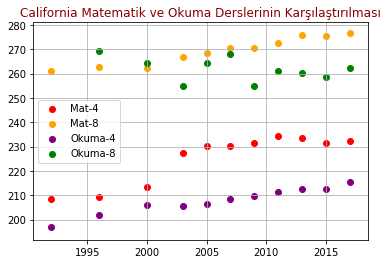

In [59]:
plt.scatter(df["YEAR"].unique(), df_cal["AVG_MATH_4_SCORE"], color="red")
plt.scatter(df["YEAR"].unique(), df_cal["AVG_MATH_8_SCORE"], color="orange")

plt.scatter(df["YEAR"].unique(), df_cal["AVG_READING_4_SCORE"], color="purple")
plt.scatter(df["YEAR"].unique(), df_cal["AVG_READING_8_SCORE"], color="green")

plt.title("California Matematik ve Okuma Derslerinin Karşılaştırılması", color="darkred")
plt.legend(["Mat-4", "Mat-8", "Okuma-4", "Okuma-8"])
plt.grid()

plt.show()

### genel olarak harcama ve gelir arttıkça notlar artma eğilimi göstermiş diyebiliriz. Ancak yeşil grafik iyi bir trend göstermiyor. 8. sınıfların notları daha iyiyken 4. sınıf notları daha düşük.

diğer yandan çok fazla NAN değeri olan bir veriden oluştu bu grafik. Eksik değerleri doldurarak tekrar inceleyelim

## 5. SORU: Matematik ve okuma notlarında birçok eksik değer olduğunu farketmişsinizdir. Eksik değerleri ortalama, medyan ve enterpolasyon ile tamamlayın. Bu tekniklerin notların dağılımı üzerindeki etkisini karşılaştırın.

In [70]:
df_cal[['AVG_MATH_4_SCORE','AVG_MATH_8_SCORE','AVG_READING_4_SCORE','AVG_READING_8_SCORE']]

dx = df_cal.copy()
dy = df_cal.copy()
dz = df_cal.copy()

In [75]:
dx.fillna(dx.mean(), inplace=True)
dy.fillna(dy.median(), inplace=True)
dz.fillna(dz.interpolate(), inplace=True)

print(dx.isnull().sum())
print(dy.isnull().sum())
print(dz.isnull().sum())

PRIMARY_KEY                     0
STATE                           0
YEAR                            0
ENROLL                          0
TOTAL_REVENUE                   0
FEDERAL_REVENUE                 0
STATE_REVENUE                   0
LOCAL_REVENUE                   0
TOTAL_EXPENDITURE               0
INSTRUCTION_EXPENDITURE         0
SUPPORT_SERVICES_EXPENDITURE    0
OTHER_EXPENDITURE               0
CAPITAL_OUTLAY_EXPENDITURE      0
GRADES_PK_G                     0
GRADES_KG_G                     0
GRADES_4_G                      0
GRADES_8_G                      0
GRADES_12_G                     0
GRADES_1_8_G                    0
GRADES_9_12_G                   0
GRADES_ALL_G                    0
AVG_MATH_4_SCORE                0
AVG_MATH_8_SCORE                0
AVG_READING_4_SCORE             0
AVG_READING_8_SCORE             0
dtype: int64
PRIMARY_KEY                     0
STATE                           0
YEAR                            0
ENROLL                          0
T

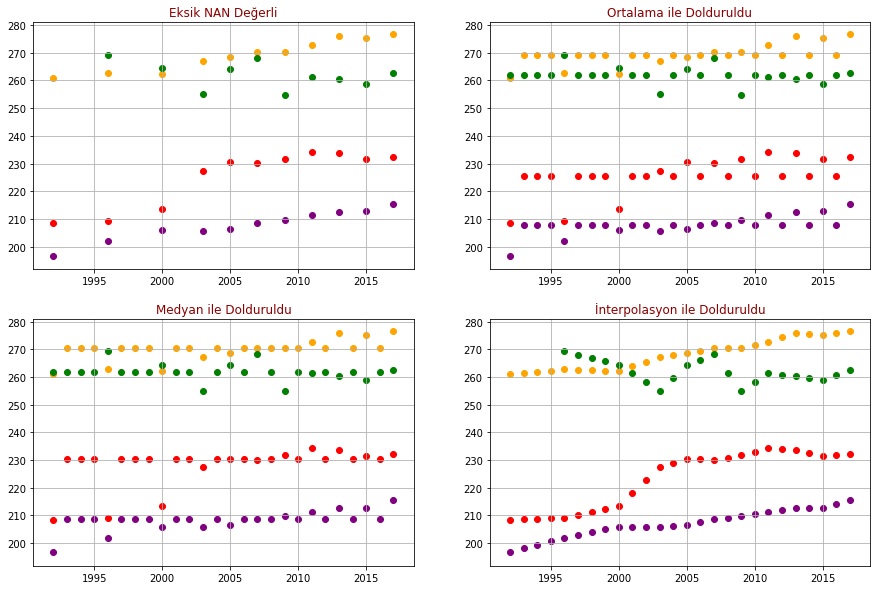

In [101]:
plt.figure(1, figsize = (15,10))

plt.subplot(2,2,1)
plt.scatter(df["YEAR"].unique(), df_cal["AVG_MATH_4_SCORE"], color="red")
plt.scatter(df["YEAR"].unique(), df_cal["AVG_MATH_8_SCORE"], color="orange")

plt.scatter(df["YEAR"].unique(), df_cal["AVG_READING_4_SCORE"], color="purple")
plt.scatter(df["YEAR"].unique(), df_cal["AVG_READING_8_SCORE"], color="green")

plt.title("Eksik NAN Değerli", color="darkred")
plt.grid()


plt.subplot(2,2,2)
plt.scatter(df["YEAR"].unique(), dx["AVG_MATH_4_SCORE"], color="red")
plt.scatter(df["YEAR"].unique(), dx["AVG_MATH_8_SCORE"], color="orange")

plt.scatter(df["YEAR"].unique(), dx["AVG_READING_4_SCORE"], color="purple")
plt.scatter(df["YEAR"].unique(), dx["AVG_READING_8_SCORE"], color="green")

plt.title("Ortalama ile Dolduruldu", color="darkred")
plt.grid()

plt.subplot(2,2,3)
plt.scatter(df["YEAR"].unique(), dy["AVG_MATH_4_SCORE"], color="red")
plt.scatter(df["YEAR"].unique(), dy["AVG_MATH_8_SCORE"], color="orange")

plt.scatter(df["YEAR"].unique(), dy["AVG_READING_4_SCORE"], color="purple")
plt.scatter(df["YEAR"].unique(), dy["AVG_READING_8_SCORE"], color="green")

plt.title("Medyan ile Dolduruldu", color="darkred")
plt.grid()

plt.subplot(2,2,4)
plt.scatter(df["YEAR"].unique(), dz["AVG_MATH_4_SCORE"], color="red")
plt.scatter(df["YEAR"].unique(), dz["AVG_MATH_8_SCORE"], color="orange")

plt.scatter(df["YEAR"].unique(), dz["AVG_READING_4_SCORE"], color="purple")
plt.scatter(df["YEAR"].unique(), dz["AVG_READING_8_SCORE"], color="green")

plt.title("İnterpolasyon ile Dolduruldu", color="darkred")
plt.grid()

plt.show()

### ortalama ve medyan ile doldurma benzer grafikler sundu, interpolasyonda eksik değerli grafiğe daha yakın fakat daha keskin grafikler elde ettik. Bu durumda bir zaman serisi olduğu için interpolasyon daha mantıklı görünüyor.